 1. Circular boundary DLA (August29/2020)
 
*Comments added June11/2021
*Aggregation goes on till required no of particles attatch to cluster
*With self adjusting LAUNCH RADIUS {moving boundary (self.R)}
*launch radius < Rmax leads to aggreagation near launch boundary
*Condition for adjusting radius needs to bee after random walk ....in the block where particles attach to cluster
***Particle is about to attache to cluster less than 20 units of current radius(whatever it is at that time),particle array is not updated(particle is not attatched) but current radius is increased by 10 units.[line 93](probably should be changed to attatch particle too)(june11/2021)


size of lattice = 310 x 310
No of particles launched = 1000
No steps taken by each particle = 1000
maximal Walk radius = 150
maximal cluster radius = 50
maximal launch radius = 70
runtime = 58.621198892593384  s
No of cluster particles = 852
fractal dimension of cluster = 1.725


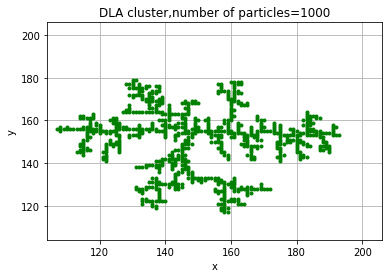

In [1]:
#Circular boundary
#August29/2020

import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt

class clusters:
    def __init__(self,number=1000,steps=1000,Rmax=50,Range=3):
        self.l      = Rmax*6+10           #size of lattice 
        self.n      = number              #no of particles launched
        self.steps  = steps               # max no of steps taken by a particle
        self._fig   = np.zeros((self.l,self.l),dtype=int)
        self.theta  = random.randint(0,360)
        self.centre = int(self.l/2)
        self.Rmax   = Rmax                # Maximum possible radius of cluster
        self.R      = 30                  # initial launch radius
        self.Rout   = self.Rmax*Range     # Maximum Walk radius
        self.cluster_count=0
        self.i=[0]
        self.j=[0]
    
    def growth(self):
        start_time = time.time()        #program runtime timer begins
        self._fig[self.centre,self.centre]=1

        counter=0
        while counter<self.n:

 #calculate radius of launch boundary, generate points, store points           
            theta=0
            while theta <361:
                theta +=0.1
                m = int(self.R*(math.cos(theta)))
                n = int(self.R*(math.sin(theta)))
                a = m + self.centre
                b = n + self.centre
                self.i.append(a)
                self.j.append(b)
                
#launch particle from random point          
            randindex=random.randint(0,len(self.i)-1)
            tempx =self.i[randindex]
            tempy =self.j[randindex] 

            
#If neighbouring point is occupied relaunch particle    
            if self._fig[tempx-1,tempy]==1:
                continue
            elif self._fig[tempx+1,tempy]==1:
                continue
            elif self._fig[tempx,tempy-1]==1:
                continue
            elif self._fig[tempx,tempy+1]==1:
                continue
                
            No_of_steps = 0
            while(True):
#walk
                temp=random.random()
                No_of_steps+=1
                if temp<0.25:
                    tempx-=1
                elif 0.25<temp<0.5:
                    tempy-=1
                elif 0.5<temp<0.75:
                    tempx+=1
                elif temp>0.75:
                    tempy+=1

 #calculate Radius of circle on which current point lies                              
                radius = (tempx-self.centre)**2+(tempy-self.centre)**2
                R = math.sqrt(radius)

#If particles goes out of boundary    
                if R >=self.Rout:
                    self._fig[tempx,tempy]=0
                    break

 #If particle exceeds no of steps a particle can walk , break               
                if No_of_steps == self.steps:
                    break
                
 #if neighbour occupied, mark current position as occupied   
               
                if self._fig[tempx-1,tempy]==1:    
                    if R >=self.Rmax-1:          #if particle is outside max cluster radius
                        counter=self.n           #(pretend to) tell counter max no of particles reached
                        break
                    if R >=self.R-20:            #if particle is about to attach to cluster at Radius > current Radius-20units
                        self.R+=10               #increase current Radius by 10units
                        break
                    elif R <self.R:              #if particle is about to attach to cluster at Radius < current Radius
                        self._fig[tempx,tempy]=1 #update array to contain particle
                        counter+=1               #update counter - one particle added to cluster
                        break
                  
                
                elif self._fig[tempx+1,tempy]==1:
                    if R >=self.Rmax-1:
                        counter=self.n
                        break
                    elif R >=self.R-20:
                        self.R+=10
                        break
                    elif R <self.R:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break
                    
                
                elif self._fig[tempx,tempy-1]==1:
                    if R >=self.Rmax-1:
                        counter=self.n
                        break
                    elif R >=self.R-20:
                        self.R+=10
                        break
                    elif R <self.R:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break
                    
                
                elif self._fig[tempx,tempy+1]==1:
                    if R >=self.Rmax-1:
                        counter=self.n
                        break
                    if R >=self.R-20:
                        self.R+=10
                        break
                    elif R <self.R:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break    
                   
            
        end_time = time.time()              #program runtime timer stops
        print('size of lattice =',self.l,'x',self.l)
        print('No of particles launched =',self.n)
        print('No steps taken by each particle =',self.steps)
        print('maximal Walk radius =',self.Rout)
        print('maximal cluster radius =',self.Rmax)
        print('maximal launch radius =',self.R)
        print('runtime =',end_time-start_time,' s')
        
 #Raster method to scan and display the cluster particles

    def show(self):
        for i in range(self.l):
            for j in range(self.l):
                if self._fig[i,j]==1:
                    self.cluster_count+=1
                    #print(i ,'       ', j)    # print the co-ordinates of particles
                    plt.plot(i,j,'g.')
                    plt.xlim(self.centre-(self.Rmax+1),self.centre+(self.Rmax+1))
                    plt.ylim(self.centre-(self.Rmax+1),self.centre+(self.Rmax+1))
                   # plt.xlim(170,330)         #Approximate limits of x and y co-ordinates
                   # plt.ylim(170,330)
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig('DLA_plt.png', dpi=300, bbox_inches='tight')
        plt.title('DLA cluster,number of particles=%.f'%self.n)
        print('No of cluster particles =',self.cluster_count)   
        FD=math.log(self.cluster_count-1)/math.log(self.Rmax)
        print ('fractal dimension of cluster =',round(FD,3))

z=clusters()
z.growth()
z.show()




2.  Square Boundary DLA with cicular max cluster radius condition (SEPTEMBER11/2020)

In [ ]:
#Square boundary
#Sep 11

import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt

class clusters:
    def __init__(self,number=5000,steps=1000,Rmax=100,Range=3):
        self.l      = Rmax*6+1
        self.n      = number
        self.steps  = steps
        self._fig   = np.zeros((self.l,self.l),dtype=int)
        self.centre = int(self.l/2)
        self.Rmax   = Rmax
        self.R      = 30
        self.Rout   = self.Rmax*Range
        self.cluster_count=0
        self.i=[0]
        self.j=[0]
      
    
    def growth(self):
        start_time = time.time()        #program runtime timer begins
        self._fig[self.centre,self.centre]=1
        bound_L=self.centre- 30
        bound_H=self.centre+ 30
        out_bound=self.l-2                  # This has to be atleast (size of array)-2 or less
        
        counter=0
        while counter<self.n:
#particle launched from a square boundary            
            temp=random.randint(1,4)
            if temp==1:
                tempx=bound_L
                tempy=random.randint(bound_L,bound_H)
            if temp==2:
                tempx=bound_H
                tempy=random.randint(bound_L,bound_H)
            if temp==3:
                tempy=bound_L
                tempx=random.randint(bound_L,bound_H)
            if temp==4:
                tempy=bound_H
                tempx=random.randint(bound_L,bound_H)

            
#If neighbouring point is occupied relaunch particle    
            if self._fig[tempx-1,tempy]==1:
                continue
            elif self._fig[tempx+1,tempy]==1:
                continue
            elif self._fig[tempx,tempy-1]==1:
                continue
            elif self._fig[tempx,tempy+1]==1:
                continue
                
            No_of_steps = 0
            while(True):
#walk
                temp=random.random()
                No_of_steps+=1
                if temp<0.25:
                    tempx-=1
                elif 0.25<temp<0.5:
                    tempy-=1
                elif 0.5<temp<0.75:
                    tempx+=1
                elif temp>0.75:
                    tempy+=1
                    
#If particles goes out of boundary  
                if tempx > out_bound:
                    break
                if tempx < 1:
                    break
                if tempy > out_bound:
                    break
                if tempy < 1:
                    break
            
                if No_of_steps == self.steps:
                    break

#calculate Radius of circle on which current point lies                
                radius = (tempx-self.centre)**2+(tempy-self.centre)**2
                R = math.sqrt(radius)

 #if neighbour occupied, mark current position as occupied   
###############
               
                if self._fig[tempx-1,tempy]==1:
                    if R >=self.Rmax:
                        counter=self.n
                        break
                    if tempx <= bound_L+20:
                        bound_L-=10
                        bound_H+=10
                        break
                    elif tempx > bound_L:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break
                  
                
                if self._fig[tempx+1,tempy]==1:
                    if R >=self.Rmax:
                        counter=self.n
                        break
                    if tempx >= bound_H-20:
                        bound_L-=10
                        bound_H+=10
                        break
                    elif tempx < bound_H:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break
                    
                
                if self._fig[tempx,tempy-1]==1:
                    if R >=self.Rmax:
                        counter=self.n
                        break
                    if tempy <= bound_L+20:
                        bound_L-=10
                        bound_H+=10
                        break
                    elif tempy > bound_L:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break
                    
                
                if self._fig[tempx,tempy+1]==1:
                    if R >=self.Rmax:
                        counter=self.n
                        break
                    if tempy >= bound_H-20:
                        bound_L-=10
                        bound_H+=10
                        break
                    elif tempy < bound_H:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break   
                   
            
        end_time = time.time()              #program runtime timer stops
        print('size of lattice =',self.l,'x',self.l)
        print('No of particles launched =',self.n)
        print('No steps taken by each particle =',self.steps)
        print('maximal Walk radius =',self.Rout)
        print('maximal cluster radius =',self.Rmax)
        print('maximal launch radius =',self.R)
        print('runtime =',end_time-start_time,' s')
        
    
    def show(self):
        for i in range(self.l):
            for j in range(self.l):
                if self._fig[i,j]==1:
                    self.cluster_count+=1
                    #print(i ,'       ', j)
                    plt.plot(i,j,'g.')
                    plt.xlim(self.centre-(self.Rmax+5),self.centre+(self.Rmax+5))
                    plt.ylim(self.centre-(self.Rmax+5),self.centre+(self.Rmax+5))
                   # plt.xlim(170,330)
                   # plt.ylim(170,330)
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig('DLA_plt.png', dpi=300, bbox_inches='tight')
        plt.title('DLA cluster,number of particles=%.f'%self.n)
        print('No of cluster particles =',self.cluster_count)   
        FD=math.log(self.cluster_count-1)/math.log(self.Rmax)
        print ('fractal dimension of cluster =',round(FD,3))

z=clusters()
z.growth()
z.show()




3.  Square Boundary DLA with square max cluster radius condition (SEPTEMBER11/2020)

In [ ]:
#Square boundary with square cluster max boundary

import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt

class clusters:
    def __init__(self,number=100000,steps=1000,Rmax=400,Range=3):
        self.l      = Rmax*6+1
        self.n      = number
        self.steps  = steps
        self._fig   = np.zeros((self.l,self.l),dtype=int)
        self.centre = int(self.l/2)
        self.Rmax   = Rmax
        self.R      = 40
        self.Rout   = self.Rmax*Range
        self.cluster_count=0
        self.i=[0]
        self.j=[0]
      
    
    def growth(self):
        start_time = time.time()        #program runtime timer begins
        self._fig[self.centre,self.centre]=1
        bound_L=self.centre - self.R
        bound_H=self.centre + self.R
        Max_L  =self.centre - self.Rmax
        Max_H  =self.centre + self.Rmax
        out_bound=self.l-2                  # This has to be atleast (size of array)-2 or less
        
        counter=0
        while counter<self.n:
#particle launched from a square boundary            
            temp=random.randint(1,4)
            if temp==1:
                tempx=bound_L
                tempy=random.randint(bound_L,bound_H)
            if temp==2:
                tempx=bound_H
                tempy=random.randint(bound_L,bound_H)
            if temp==3:
                tempy=bound_L
                tempx=random.randint(bound_L,bound_H)
            if temp==4:
                tempy=bound_H
                tempx=random.randint(bound_L,bound_H)

            
#If neighbouring point is occupied relaunch particle    
            if self._fig[tempx-1,tempy]==1:
                continue
            elif self._fig[tempx+1,tempy]==1:
                continue
            elif self._fig[tempx,tempy-1]==1:
                continue
            elif self._fig[tempx,tempy+1]==1:
                continue
                
            No_of_steps = 0
            while(True):
#walk
                temp=random.random()
                No_of_steps+=1
                if temp<0.25:
                    tempx-=1
                elif 0.25<temp<0.5:
                    tempy-=1
                elif 0.5<temp<0.75:
                    tempx+=1
                elif temp>0.75:
                    tempy+=1
                    
#If particles goes out of boundary  
                if tempx > out_bound:
                    break
                if tempx < 1:
                    break
                if tempy > out_bound:
                    break
                if tempy < 1:
                    break
            
                if No_of_steps == self.steps:
                    break

#calculate Radius of circle on which current point lies                
                radius = (tempx-self.centre)**2+(tempy-self.centre)**2
                R = math.sqrt(radius)

 #if neighbour occupied, mark current position as occupied   
###############
               
                if self._fig[tempx-1,tempy]==1:
                    if tempx <= Max_L or tempx >= Max_H:
                        counter=self.n
                        break
                    if tempx <= bound_L:
                        bound_L-=30
                        bound_H+=30
                        break
                    elif tempx > bound_L:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break
                  
                
                if self._fig[tempx+1,tempy]==1:
                    if tempx <= Max_L or tempx >= Max_H:
                        counter=self.n
                        break
                    if tempx >= bound_H:
                        bound_L-=30
                        bound_H+=30
                        break
                    elif tempx < bound_H:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break
                    
                
                if self._fig[tempx,tempy-1]==1:
                    if tempy <= Max_L or tempy >= Max_H:
                        counter=self.n
                        break
                    if tempy <= bound_L:
                        bound_L-=30
                        bound_H+=30
                        break
                    elif tempy > bound_L:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break
                    
                
                if self._fig[tempx,tempy+1]==1:
                    if tempy <= Max_L or tempy >= Max_H:
                        counter=self.n
                        break
                    if tempy >= bound_H:
                        bound_L-=30
                        bound_H+=30
                        break
                    elif tempy < bound_H:
                        self._fig[tempx,tempy]=1
                        counter+=1
                        break   
                   
            
        end_time = time.time()              #program runtime timer stops
        print('size of lattice =',self.l,'x',self.l)
        print('No of particles launched =',self.n)
        print('No steps taken by each particle =',self.steps)
        print('maximal Walk radius =',self.Rout)
        print('maximal cluster radius =',self.Rmax)
        print('minimal launch radius =',self.R)
        print('runtime =',end_time-start_time,' s')
        
    
    def show(self):
        for i in range(self.l):
            for j in range(self.l):
                if self._fig[i,j]==1:
                    self.cluster_count+=1
                    #print(i ,'       ', j)
                    plt.plot(i,j,'g.')
                    plt.xlim(self.centre-(self.Rmax+5),self.centre+(self.Rmax+5))
                    plt.ylim(self.centre-(self.Rmax+5),self.centre+(self.Rmax+5))
                   # plt.xlim(170,330)
                   # plt.ylim(170,330)
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig('DLA_plt.png', dpi=300, bbox_inches='tight')
        plt.title('DLA cluster,number of particles=%.f'%self.n)
        print('No of cluster particles =',self.cluster_count)   
        FD=math.log(self.cluster_count-1)/math.log(self.Rmax)
        print ('fractal dimension of cluster =',round(FD,3))

z=clusters()
z.growth()
z.show()


